In [89]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import hvplot.pandas
import numpy as np
import seaborn as sns

%matplotlib inline

In [90]:
# Load .env enviroment variables
load_dotenv()

True

In [91]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [92]:
# Format current date as ISO format
# Get 5 years' worth of historical data for OIH IYE and AGG
start_date = pd.Timestamp("2018-07-10", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-07-10", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["IYE"]
# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_IYE = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
IYE = df_IYE[df_IYE['symbol']=="IYE"].drop('symbol', axis=1)
# Preview DataFrame
df_IYE.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2018-07-10 04:00:00+00:00,42.76,43.10,42.6200,42.74,542509,3614,42.776057,IYE
2018-07-11 04:00:00+00:00,42.37,42.61,41.5300,41.80,572767,3941,42.065254,IYE
2018-07-12 04:00:00+00:00,42.03,42.11,41.5700,41.85,577060,4246,41.803008,IYE
2018-07-13 04:00:00+00:00,41.94,42.35,41.8500,42.10,419597,3069,42.152569,IYE
2018-07-16 04:00:00+00:00,41.64,41.84,41.2036,41.57,448158,3474,41.473019,IYE


In [93]:
# Count nulls
df_IYE.isnull().sum()

open           0
high           0
low            0
close          0
volume         0
trade_count    0
vwap           0
symbol         0
dtype: int64

In [94]:
#Due to having no nulls, there is no need to drop nulls
# Check Data Types
df_IYE.dtypes

open           float64
high           float64
low            float64
close          float64
volume           int64
trade_count      int64
vwap           float64
symbol          object
dtype: object

In [95]:
 # Use the `drop` function to delete unnecessary columns
df_IYE = df_IYE.drop(columns=["open", "high", "low", "volume", "trade_count", "vwap", "symbol"])
df_IYE.head()

,close
timestamp,
2018-07-10 04:00:00+00:00,42.74
2018-07-11 04:00:00+00:00,41.80
2018-07-12 04:00:00+00:00,41.85
2018-07-13 04:00:00+00:00,42.10
2018-07-16 04:00:00+00:00,41.57


In [96]:
# Calculate Daily Returns
df_iye_returns = df_IYE.pct_change()
# Drop nulls
df_iye_returns.dropna(inplace = True)
df_iye_returns.head()

,close
timestamp,
2018-07-11 04:00:00+00:00,-0.021993
2018-07-12 04:00:00+00:00,0.001196
2018-07-13 04:00:00+00:00,0.005974
2018-07-16 04:00:00+00:00,-0.012589
2018-07-17 04:00:00+00:00,-0.003608


In [97]:
# Rename `close` Column to be specific to this portfolio.
df_iye_returns.rename(columns = {"close":"IYE"}, inplace = True)
df_iye_returns.head()

,IYE
timestamp,
2018-07-11 04:00:00+00:00,-0.021993
2018-07-12 04:00:00+00:00,0.001196
2018-07-13 04:00:00+00:00,0.005974
2018-07-16 04:00:00+00:00,-0.012589
2018-07-17 04:00:00+00:00,-0.003608


In [98]:
# Format current date as ISO format
start_date = pd.Timestamp("2022-7-10", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-7-10", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["OIH"]
# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"
# Get current closing prices for SPY and AGG
df_oih = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
).df
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
OIH = df_oih[df_oih['symbol']=='OIH'].drop('symbol', axis=1)
# Preview DataFrame
df_oih.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-07-11 04:00:00+00:00,218.13,220.62,214.9400,217.45,637899,9403,217.473957,OIH
2022-07-12 04:00:00+00:00,210.51,213.46,206.9500,209.64,1620997,20725,209.786024,OIH
2022-07-13 04:00:00+00:00,206.29,213.50,206.1900,207.95,760205,8609,209.067824,OIH
2022-07-14 04:00:00+00:00,198.90,201.64,195.7700,201.04,900018,13686,199.189745,OIH
2022-07-15 04:00:00+00:00,205.83,206.39,199.9601,205.41,720555,9327,203.480363,OIH


In [99]:
#drop columns
df_oih = df_oih.drop(columns=["open", "high", "low", "volume", "trade_count", "vwap", "symbol"])
df_oih.head()

,close
timestamp,
2022-07-11 04:00:00+00:00,217.45
2022-07-12 04:00:00+00:00,209.64
2022-07-13 04:00:00+00:00,207.95
2022-07-14 04:00:00+00:00,201.04
2022-07-15 04:00:00+00:00,205.41


In [100]:
# Calculate Daily Returns
df_oih_returns = df_oih.pct_change()
df_oih_returns.head()

,close
timestamp,
2022-07-11 04:00:00+00:00,NaN
2022-07-12 04:00:00+00:00,-0.035916
2022-07-13 04:00:00+00:00,-0.008061
2022-07-14 04:00:00+00:00,-0.033229
2022-07-15 04:00:00+00:00,0.021737


In [101]:
#drop nulls
df_oih_returns.dropna(inplace=True)
df_oih_returns.head()

,close
timestamp,
2022-07-12 04:00:00+00:00,-0.035916
2022-07-13 04:00:00+00:00,-0.008061
2022-07-14 04:00:00+00:00,-0.033229
2022-07-15 04:00:00+00:00,0.021737
2022-07-18 04:00:00+00:00,0.040796


In [102]:
#rename close column to OIH ticker
df_oih_returns.rename(columns={"close":"OIH"}, inplace=True)
df_oih_returns.head()

,OIH
timestamp,
2022-07-12 04:00:00+00:00,-0.035916
2022-07-13 04:00:00+00:00,-0.008061
2022-07-14 04:00:00+00:00,-0.033229
2022-07-15 04:00:00+00:00,0.021737
2022-07-18 04:00:00+00:00,0.040796


In [103]:
# Format current date as ISO format
start = pd.Timestamp('2022-07-10', tz = 'America/New_York').isoformat()
end = pd.Timestamp('2023-07-10', tz = 'America/New_York').isoformat()
# Set the tickers
tickers = ['XME']
# Set timeframe for Alpaca API
timeframe = "1Day"
# Get current closing prices for SPY and AGG
df_xme = alpaca.get_bars(
    tickers,
    timeframe,
    start = start,
    end = end
).df
# Reorganize the DataFrame
# Separate ticker data
XME = df_xme[df_xme['symbol']=='XME'].drop('symbol', axis = 1)
# Preview DataFrame
df_xme.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-07-11 04:00:00+00:00,42.33,42.94,42.02,42.25,2944477,26242,42.367957,XME
2022-07-12 04:00:00+00:00,41.91,43.36,41.62,42.45,3262254,32031,42.582558,XME
2022-07-13 04:00:00+00:00,41.98,43.76,41.90,43.37,3873714,33825,43.110836,XME
2022-07-14 04:00:00+00:00,41.96,42.15,41.09,42.09,7555956,52072,41.556745,XME
2022-07-15 04:00:00+00:00,42.89,42.98,41.61,42.91,2975824,27581,42.492866,XME


In [104]:
# Drop columns
df_xme = df_xme.drop(columns = ['open', 'high', 'low', 'volume', 'trade_count', 'vwap', 'symbol'])
df_xme.head()

,close
timestamp,
2022-07-11 04:00:00+00:00,42.25
2022-07-12 04:00:00+00:00,42.45
2022-07-13 04:00:00+00:00,43.37
2022-07-14 04:00:00+00:00,42.09
2022-07-15 04:00:00+00:00,42.91


In [105]:
# Calculate Daily Returns
df_xme_returns = df_xme.pct_change()
# Drop nulls
df_xme_returns = df_xme_returns.dropna()
df_xme_returns.head()

,close
timestamp,
2022-07-12 04:00:00+00:00,0.004734
2022-07-13 04:00:00+00:00,0.021673
2022-07-14 04:00:00+00:00,-0.029513
2022-07-15 04:00:00+00:00,0.019482
2022-07-18 04:00:00+00:00,0.016779


In [106]:
# Rename `close` Column to XME ticker.
df_xme_returns.rename(columns = {'close': 'XME'}, inplace = True)
df_xme_returns.head()

,XME
timestamp,
2022-07-12 04:00:00+00:00,0.004734
2022-07-13 04:00:00+00:00,0.021673
2022-07-14 04:00:00+00:00,-0.029513
2022-07-15 04:00:00+00:00,0.019482
2022-07-18 04:00:00+00:00,0.016779


In [107]:
# Join IYE, OIH, and the XME Returns into a single DataFrame with columns for each portfolio's returns.
df_daily = pd.concat([df_iye_returns, df_oih_returns, df_xme_returns], axis = "columns",join = "inner")
df_daily.head()

,IYE,OIH,XME
timestamp,,,
2022-07-12 04:00:00+00:00,-0.020550,-0.035916,0.004734
2022-07-13 04:00:00+00:00,0.000272,-0.008061,0.021673
2022-07-14 04:00:00+00:00,-0.017434,-0.033229,-0.029513
2022-07-15 04:00:00+00:00,0.016912,0.021737,0.019482
2022-07-18 04:00:00+00:00,0.021538,0.040796,0.016779


In [108]:
# Plot daily returns of all portfolios
df_daily.hvplot(
    x="timestamp",
    y=["IYE", "OIH", "XME"],
    xlabel="Date",
    ylabel="Daily Returns",
    width=700,
    height=500,
    legend="top",
    title="ETF Daily Returns"
).opts(yformatter="%.0f")

:NdOverlay   [Variable]
   :Curve   [timestamp]   (value)

In [109]:
# Calculate cumulative returns of all portfolios
df_cum = (1+ df_daily).cumprod()
# Plot cumulative returns
df_cum.hvplot( 
    x="timestamp",
    y=["IYE", "OIH", "XME"],
    xlabel="Date",
    ylabel="Cumulative Returns",
    width=700,
    height=500,
    legend="top",
    title="ETF Cumulative Returns"
).opts(yformatter="%.0f")

:NdOverlay   [Variable]
   :Curve   [timestamp]   (value)

<Axes: >

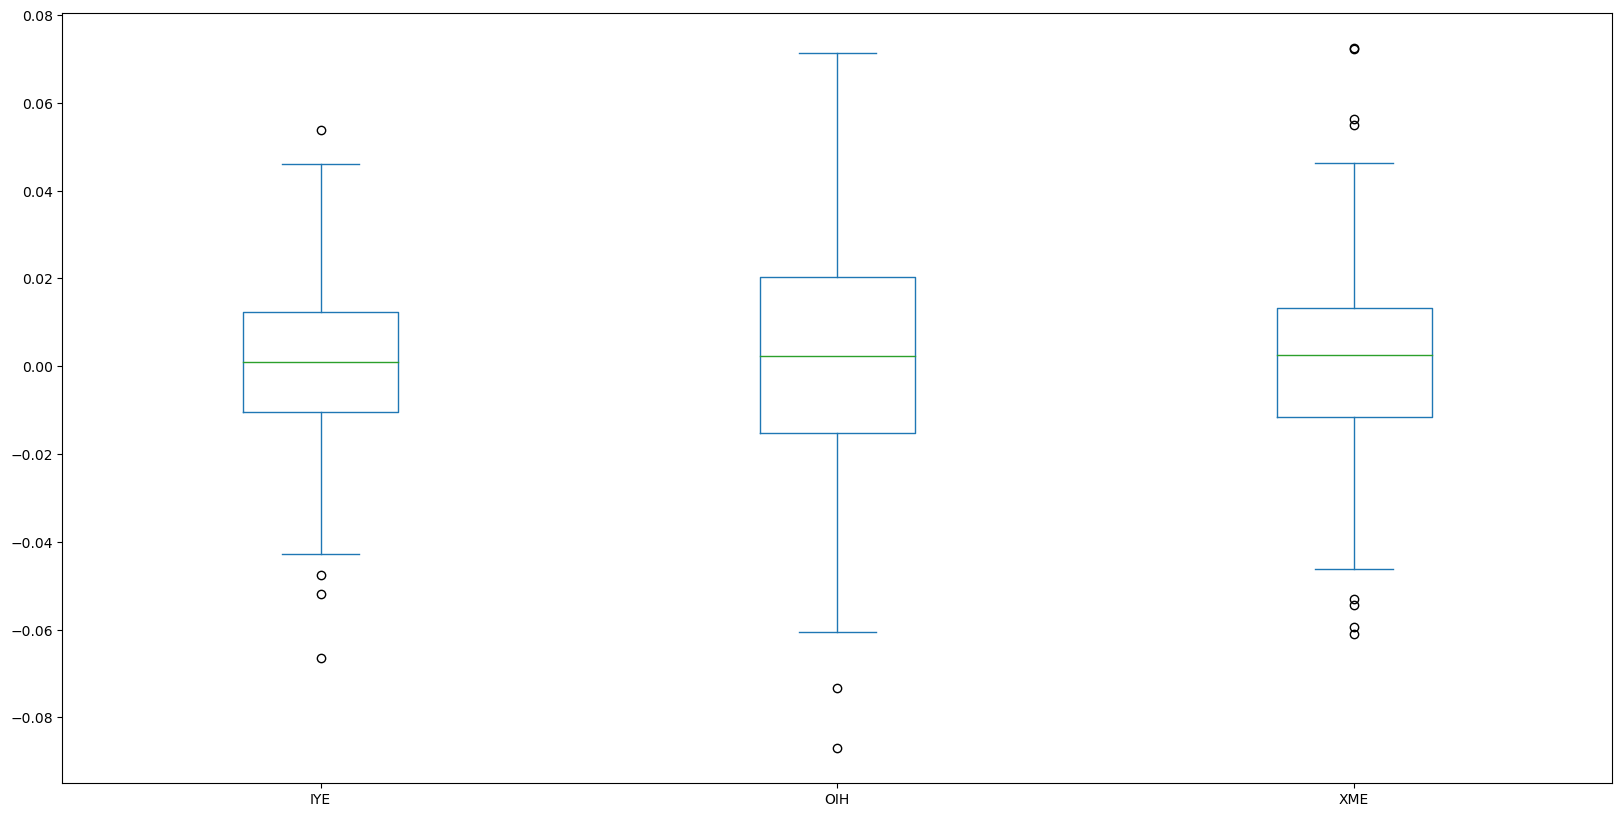

In [110]:
# Box plot to visually show risk
#df_daily.hvplot.box(
    #x=["IYE", "OIH", "XME"],
    #y="Daily Returns",
    #xlabel="ETFs",
    #ylabel="Daily Returns",
    #width=700,
    #height=500,
    #legend="top",
    #title="ETF Daily Returns Risk Analysis"
#).opts(yformatter="%.0f")
df_daily.plot(kind = "box", figsize = (20,10))

In [111]:
# Calculate the daily standard deviations of all portfolios
df_daily_std = pd.DataFrame(df_daily.std()).rename(columns = {0:"std"})
df_daily_std

,std
IYE,0.018638
OIH,0.026774
XME,0.021376


In [112]:
# Calculate the annualized standard deviation (252 trading days)
df_annualized_std = df_daily_std*np.sqrt(252)
df_annualized_std

,std
IYE,0.295866
OIH,0.425021
XME,0.339336


In [113]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
df_daily.rolling(window=21).std().hvplot( 
    x="timestamp",
    y=["IYE", "OIH", "XME"],
    xlabel="Date",
    ylabel="Daily Returns",
    width=700,
    height=500,
    legend="top",
    title="21 Day Rolling STD"
).opts(yformatter="%.0f")

:NdOverlay   [Variable]
   :Curve   [timestamp]   (value)

In [114]:
# Calculate the correlation
correlation = df_daily.corr()
# Display de correlation matrix
correlation

,IYE,OIH,XME
IYE,1.000000,0.906929,0.666521
OIH,0.906929,1.000000,0.665805
XME,0.666521,0.665805,1.000000


<Axes: >

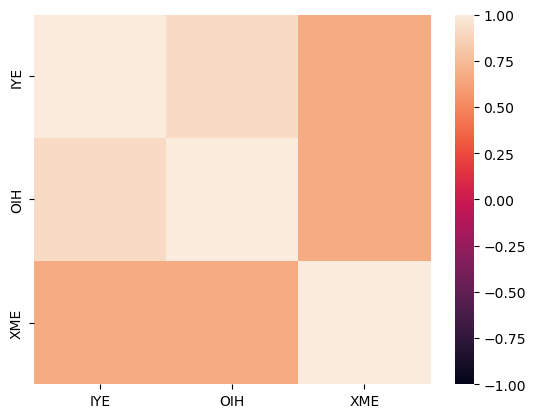

In [115]:
# Use the `heatmap` function from the seaborn library to visualize correlations
sns.heatmap(correlation, vmin=-1, vmax=1)

<Axes: xlabel='timestamp'>

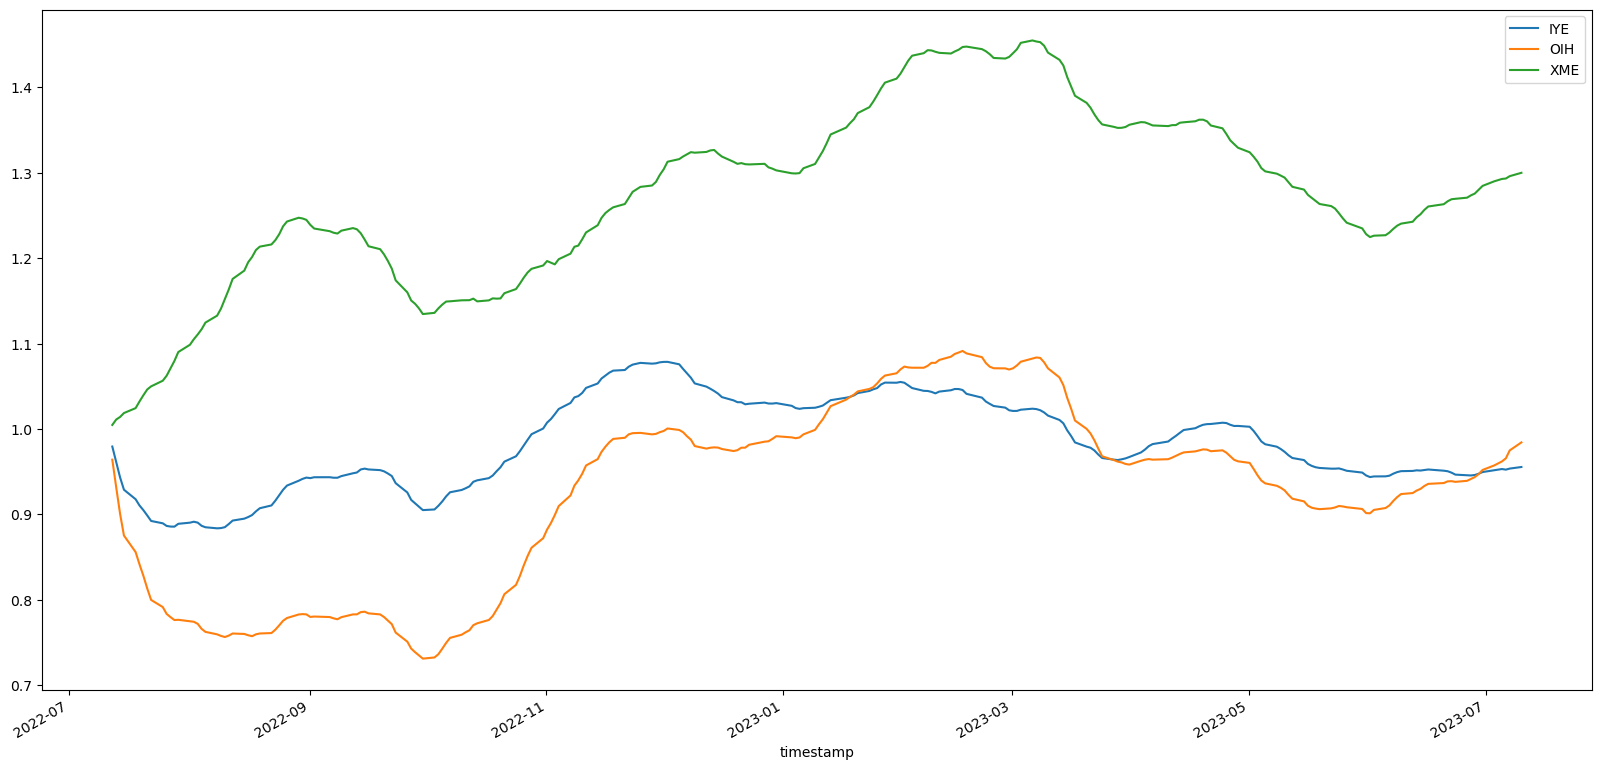

In [120]:
# Use `ewm` to calculate the rolling window
df_daily_std.ewm(halflife=21).mean()
df_daily_std = df_daily.ewm(span = 21,adjust = False).mean()
(1+df_daily_std).cumprod().plot(figsize = (20,10))

In [121]:
# Annualized Sharpe Ratios
sharpe_ratios = df_daily.mean()*252/(df_daily.std()*np.sqrt(252))
sharpe_ratios

IYE    0.618257
OIH    1.057266
XME    0.735193
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

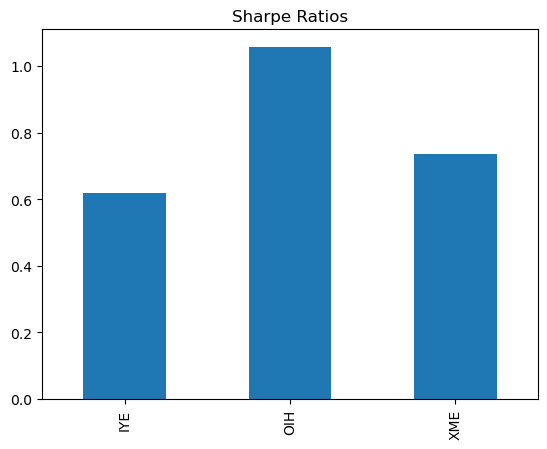

In [122]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

In [123]:
#Out of the three ETFs, OIH performed the best